In [56]:
import numpy as np
import matplotlib.pyplot as mp
%matplotlib inline
data_dir = '/Volumes/Annie/CRRP/'

In [57]:
clusters = np.array(['M4', 'NGC3201', 'M5', 'M15', 'M14'])
slopes3p6 = np.array([-2.30, -2.59, -2.24, -2.61, -2.78])
errs3p6 = np.array([0.11, 0.14, 0.31, 0.27, 0.57])
slopes4p5 = np.array([-2.34, -2.58, -2.37, -2.68, -2.00])
errs4p5 = np.array([0.10, 0.15, 0.28, 0.26, 0.55])
empirical_3p6zp = np.array([10.24, 12.18, 13.23, 13.86, 13.47])
empirical_3p6zp_err = np.array([0.04, 0.04, 0.09, 0.07, 0.15])
empirical_4p5zp = np.array([10.23, 12.19, 13.19, 13.84, 13.83])
empirical_4p5zp_err = np.array([0.03, 0.04, 0.08, 0.07, 0.13])

cluster_feh = np.array([-1.16, -1.59, -1.29, -2.37, -1.28])

theory_slope3p6 = -2.251
theory_err3p6 = 0.018
theory_slope4p5 = -2.239
theory_err4p5 = 0.018

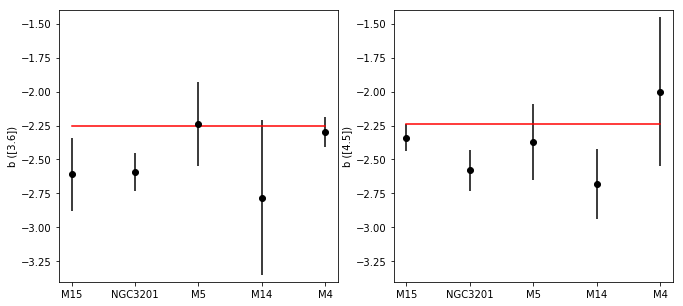

In [58]:
x = np.arange(5)
order = np.argsort(cluster_feh)
fig = mp.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
ax1.plot([0, 4], [theory_slope3p6, theory_slope3p6], color='r')
ax1.errorbar(x, slopes3p6[order], yerr=errs3p6[order], fmt='o', color='k')
ax1.set_ylabel('b ([3.6])')
ax1.set_ylim((-3.4, -1.4))
ax1.set_xticks(x)
ax1.set_xticklabels(clusters[order])

ax2 = fig.add_subplot(122)
ax2.plot([0, 4], [theory_slope4p5, theory_slope4p5], color='r')
ax2.errorbar(x, slopes4p5, yerr=errs4p5, fmt='o', color='k')
ax2.set_ylabel('b ([4.5])')
ax2.set_ylim((-3.4, -1.4))
ax2.set_xticks(x)
ax2.set_xticklabels(clusters[order])

mp.savefig(data_dir+'slopes.eps', format='eps')

In [59]:
avg_slope3p6 = np.average(slopes3p6, weights=1/errs3p6**2)
avg_slope4p5 = np.average(slopes4p5, weights=1/errs4p5**2)
avg_err3p6 = np.sqrt(1/np.sum(1/errs3p6**2))
avg_err4p5 = np.sqrt(1/np.sum(1/errs4p5**2))
print avg_slope3p6, avg_err3p6
print avg_slope4p5, avg_err4p5

-2.42371369829 0.0788438203254
-2.42531140615 0.0755285649667


In [60]:
cluster_slope3p6 = -2.424
cluster_slope3p6_err = 0.079
cluster_slope4p5 = -2.425
cluster_slope4p5_err = 0.076

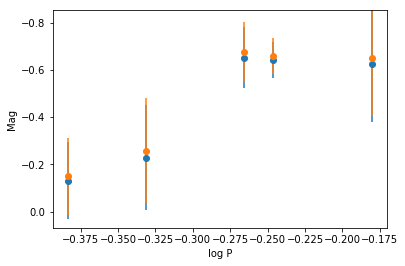

In [61]:
galactic_rrl = np.array(['RZ Cep', 'XZ Cyg', 'UV Oct', 'RR Lyr', 'SU Dra'])
galactic_avgs3p6 = np.array([7.891, 8.676, 8.200, 6.486, 8.616])
galactic_errs3p6 = np.array([0.007, 0.016, 0.014, 0.014, 0.019])
galactic_avgs4p5 = np.array([7.865, 8.645, 8.174, 6.468, 8.588])
galactic_errs4p5 = np.array([0.006, 0.017, 0.014, 0.014, 0.019])
galactic_periods = np.array([0.308645, 0.466579, 0.542600263, 0.566805, 0.660419])
galactic_ebv = np.array([0.252, 0.100, 0.090, 0.042, 0.010])
galactic_a3p6 = 3.1*galactic_ebv*0.060
galactic_a4p5 = 3.1*galactic_ebv*0.051

hst_parallax = np.array([2.54, 1.67, 1.71, 3.77, 1.42])
hst_parallax_err = np.array([0.19, 0.17, 0.10, 0.13, 0.16])
hst_dist = 1/(hst_parallax*1e-3)
hst_mu = 5*np.log10(hst_dist) - 5.
mu_plus = 5*np.log10(1e3 / (hst_parallax + hst_parallax_err)) - 5
mu_minus = 5*np.log10(1e3 / (hst_parallax - hst_parallax_err)) - 5
hst_mu_err = (mu_minus - mu_plus) / 2.



galactic_M3p6 = galactic_avgs3p6 - hst_mu - galactic_a3p6
galactic_M4p5 = galactic_avgs4p5 - hst_mu - galactic_a4p5
galactic_M3p6_err = np.sqrt(hst_mu_err**2+galactic_errs3p6**2)
galactic_M4p5_err = np.sqrt(hst_mu_err**2+galactic_errs4p5**2)

fun_periods = np.log10(galactic_periods)
fun_periods[0] += 0.127
fig = mp.figure()
ax = fig.add_subplot(111)
ax.errorbar(fun_periods, galactic_M3p6, yerr = galactic_M3p6_err, fmt='o')
ax.errorbar(fun_periods, galactic_M4p5, yerr = galactic_M4p5_err, fmt='o')
ax.set_ylim((np.max(galactic_M3p6)+0.2, np.min(galactic_M3p6)-0.2))
ax.set_xlabel('log P')
ax.set_ylabel('Mag')

In [62]:
zps_3p6 = galactic_M3p6 - cluster_slope3p6 * fun_periods
zps_4p5 = galactic_M4p5 - cluster_slope4p5 * fun_periods

zp_3p6 = np.average(zps_3p6, weights=1/galactic_M3p6_err**2)
zp_3p6_err = np.sqrt(1/np.sum(1/galactic_M3p6_err**2))
zp_4p5 = np.average(zps_4p5, weights=1/galactic_M4p5_err**2)
zp_4p5_err = np.sqrt(1/np.sum(1/galactic_M4p5_err**2))
print zp_3p6, zp_3p6_err
print zp_4p5, zp_4p5_err

-1.20461940011 0.0570077789685
-1.22463153976 0.057007316331


In [63]:
cluster_3p6zp = -1.204
cluster_3p6zp_err = 0.057
cluster_4p5zp = -1.226
cluster_4p5zp_err = 0.057

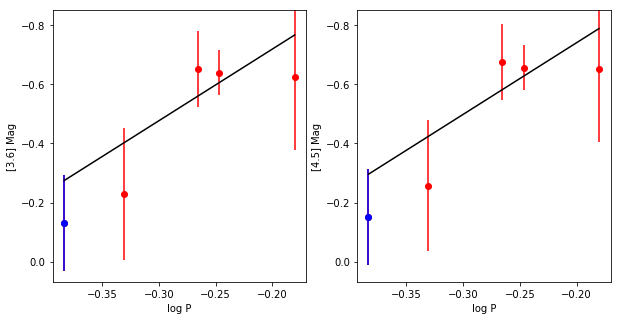

In [65]:
fig = mp.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax1.errorbar(fun_periods, galactic_M3p6, yerr = galactic_M3p6_err, fmt='o', color='r')
ax1.errorbar(fun_periods[0], galactic_M3p6[0], yerr = galactic_M3p6_err[0], fmt='o', color='b')
ax1.set_ylim((np.max(galactic_M3p6)+0.2, np.min(galactic_M3p6)-0.2))
ax1.set_xlabel('log P')
ax1.set_ylabel('[3.6] Mag')
y_3p6 = cluster_slope3p6*fun_periods + cluster_3p6zp
ax1.plot(fun_periods, y_3p6, color='k')

ax2 = fig.add_subplot(122)
ax2.errorbar(fun_periods, galactic_M4p5, yerr = galactic_M4p5_err, fmt='o', color='r')
ax2.errorbar(fun_periods[0], galactic_M4p5[0], yerr = galactic_M4p5_err[0], fmt='o', color='b')
ax2.set_ylim((np.max(galactic_M3p6)+0.2, np.min(galactic_M3p6)-0.2))
ax2.set_xlabel('log P')
ax2.set_ylabel('[4.5] Mag')
y_4p5 = cluster_slope4p5*fun_periods + cluster_4p5zp
ax2.plot(fun_periods, y_4p5, color='k')

mp.savefig(data_dir+'Calibrated-PL.eps', format='eps')

## Distance Moduli

In [14]:
# read in cluster RRL avgs
data_dir = '/Volumes/Annie/CRRP/'

dtype = np.dtype([('name', 'S10'), ('period', float), ('type', 'S6'), ('dist', float), ('U', float), ('Uer', float), 
                    ('Uamp', float), ('B', float), ('Ber', float), ('Bamp', float), ('V', float),
                    ('Ver', float), ('Vamp', float), ('R', float), ('Rer', float), ('Ramp', float),
                    ('I', float), ('Ier', float), ('Iamp', float), ('J', float), ('Jer', float),
                    ('Jamp', float), ('H', float), ('Her', float), ('Hamp', float), ('K', float),
                    ('Ker', float), ('Kamp', float), ('3.6', float), ('3.6er', float), ('3.6amp', float),
                    ('4.5', float), ('4.5er', float), ('4.5amp', float)])

N3201_data = np.loadtxt(data_dir+'NGC3201/RRL-avg-mags.txt', dtype=dtype)
M5_data = np.loadtxt(data_dir+'NGC5904/RRL-avg-mags.txt', dtype=dtype)
M15_data = np.loadtxt(data_dir+'NGC7078/RRL-avg-mags.txt', dtype=dtype)
M14_data = np.loadtxt(data_dir+'NGC6402/RRL-avg-mags.txt', dtype=dtype)

dtype2 = np.dtype([('name', 'S3'), ('3.6', float), ('3.6er', float), ('4.5', float), ('4.5er', float), 
                  ('period', float), ('type', int)])
M4_data = np.loadtxt(data_dir+'M4-irac-avgs.dat', dtype=dtype2, usecols=(0,1,2,5,6,13,14))

cluster_ebv = np.array([0.35, 0.24, 0.03, 0.10, 0.60])
Rv = 3.1
a3p6_av = 0.066
a4p5_av = 0.051

# correct for extinction (M4 follows different extinction law)
M4_data['3.6'] += -1.317*0.56*0.123
M4_data['4.5'] += -1.317*0.43*0.123
N3201_data['3.6'] += -Rv*cluster_ebv[1]*a3p6_av
N3201_data['4.5'] += -Rv*cluster_ebv[1]*a4p5_av
M5_data['3.6'] += -Rv*cluster_ebv[2]*a3p6_av
M5_data['4.5'] += -Rv*cluster_ebv[2]*a4p5_av
M15_data['3.6'] += -Rv*cluster_ebv[3]*a3p6_av
M15_data['4.5'] += -Rv*cluster_ebv[3]*a4p5_av
M14_data['3.6'] += -Rv*cluster_ebv[4]*a3p6_av
M14_data['4.5'] += -Rv*cluster_ebv[4]*a4p5_av

# select only stars used in PL 
M4_3p6_use = np.array(['V01', 'V02', 'V05', 'V06', 'V07', 'V08', 'V09', 'V10', 'V12', 'V14', 'V15',
                       'V16', 'V18', 'V19', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
                       'V37', 'V38', 'V39', 'V40', 'V41', 'V49', 'V52', 'V61', 'C01'])
M4_4p5_use = np.array(['V01', 'V02', 'V03', 'V05', 'V07', 'V08', 'V09', 'V10', 'V11', 'V12', 'V14', 'V16',
                       'V18', 'V22', 'V23', 'V24', 'V25', 'V26', 'V28', 'V36', 'V37', 'V38', 'V39', 'V40', 
                       'V41', 'V49', 'V52', 'V61', 'C01'])
N3201_3p6_use = np.array(['V1', 'V10', 'V100', 'V12', 'V13', 'V14', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21',
 'V22', 'V23', 'V25', 'V26', 'V28', 'V29', 'V3', 'V31', 'V32', 'V34', 'V35', 'V37',
 'V4', 'V40', 'V41', 'V42', 'V44', 'V47', 'V48', 'V49', 'V5', 'V51', 'V56', 'V57',
 'V58', 'V6', 'V7', 'V71', 'V77', 'V78', 'V8', 'V80', 'V83', 'V98'])
N3201_4p5_use = ['V1', 'V10', 'V100', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19', 'V2', 'V20',
 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V29', 'V3', 'V31', 'V32', 'V35', 'V37',
 'V39', 'V4', 'V40', 'V42', 'V43', 'V44', 'V47', 'V48', 'V49', 'V5', 'V51', 'V57',
 'V59', 'V6', 'V67', 'V71', 'V73', 'V76', 'V78', 'V8', 'V80', 'V83', 'V9', 'V98']
M5_3p6_use = ['V1', 'V11', 'V114', 'V12', 'V130', 'V14', 'V16', 'V161', 'V17', 'V26', 'V27', 'V30',
 'V33', 'V34', 'V36', 'V38', 'V4', 'V40', 'V41', 'V45', 'V5', 'V52', 'V54', 'V55',
 'V56', 'V59', 'V64', 'V65', 'V7', 'V78', 'V80', 'V81', 'V82', 'V83', 'V85', 'V87',
 'V89', 'V90', 'V91', 'V95', 'V96']
M5_4p5_use = ['V1', 'V11', 'V114', 'V115', 'V12', 'V129', 'V130', 'V139', 'V14', 'V16', 'V161',
 'V17', 'V26', 'V27', 'V30', 'V33', 'V34', 'V36', 'V38', 'V4', 'V40', 'V41', 'V44',
 'V45', 'V47', 'V5', 'V54', 'V55', 'V56', 'V57', 'V59', 'V64', 'V65', 'V7', 'V80',
 'V81', 'V86', 'V87', 'V89', 'V90', 'V91', 'V96', 'V97']
M15_3p6_use = ['NV6', 'V10', 'V102=NV10', 'V11', 'V12', 'V13', 'V16', 'V19', 'V2', 'V20', 'V21',
 'V22', 'V23', 'V24', 'V25', 'V3', 'V32', 'V35', 'V36', 'V37', 'V38', 'V4', 'V40',
 'V42', 'V44', 'V45', 'V46=V112', 'V48', 'V5', 'V50', 'V52', 'V56', 'V6', 'V60', 'V63',
 'V65', 'V66', 'V74', 'V8', 'V9', 'V97', 'V99']
M15_4p5_use = ['NV6', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V18', 'V19', 'V2', 'V20',
 'V21', 'V23', 'V24', 'V25', 'V3', 'V35', 'V36', 'V37', 'V38', 'V40', 'V41', 'V42',
 'V44', 'V45', 'V46=V112', 'V48', 'V49', 'V5', 'V50', 'V52', 'V55', 'V56', 'V6', 'V60',
 'V65', 'V66', 'V7', 'V74', 'V8', 'V9', 'V97', 'V99']
M14_3p6_use = ['V10', 'V110', 'V111', 'V118', 'V13', 'V130', 'V133', 'V14', 'V140', 'V15', 'V150',
               'V16', 'V160', 'V18', 'V19', 'V20', 'V22', 'V23', 'V24', 'V3', 'V32', 'V33', 'V34',
 'V39', 'V4', 'V42', 'V43', 'V44', 'V46', 'V48', 'V49', 'V5', 'V57', 'V58', 'V59',
 'V75', 'V77', 'V78', 'V8', 'V9', 'V98']
M14_4p5_use = ['V10', 'V106', 'V110', 'V118', 'V13', 'V130', 'V14', 'V140', 'V141', 'V143', 'V15',
 'V150', 'V19', 'V22', 'V24', 'V25', 'V3', 'V31', 'V32', 'V33', 'V34', 'V42', 'V43',
 'V44', 'V47', 'V59', 'V60', 'V70', 'V75', 'V77', 'V8', 'V80', 'V88', 'V9']


M4_3p6 = M4_data['3.6'][np.in1d(M4_data['name'], M4_3p6_use) == True]
M4_4p5 = M4_data['4.5'][np.in1d(M4_data['name'], M4_4p5_use) == True]
M4_3p6_er = M4_data['3.6er'][np.in1d(M4_data['name'], M4_3p6_use) == True]
M4_4p5_er = M4_data['4.5er'][np.in1d(M4_data['name'], M4_4p5_use) == True]
M4_logP_3p6 = np.log10(M4_data['period'][np.in1d(M4_data['name'], M4_3p6_use) == True])
M4_logP_4p5 = np.log10(M4_data['period'][np.in1d(M4_data['name'], M4_4p5_use) == True])
M4_mode_3p6 = M4_data['type'][np.in1d(M4_data['name'], M4_3p6_use) == True]
M4_mode_4p5 = M4_data['type'][np.in1d(M4_data['name'], M4_4p5_use) == True]
M4_logP_3p6[M4_mode_3p6 == 1] += 0.127
M4_logP_4p5[M4_mode_4p5 == 1] += 0.127

N3201_3p6 = N3201_data['3.6'][np.in1d(N3201_data['name'], N3201_3p6_use) == True]
N3201_4p5 = N3201_data['4.5'][np.in1d(N3201_data['name'], N3201_4p5_use) == True]
N3201_3p6_er = N3201_data['3.6er'][np.in1d(N3201_data['name'], N3201_3p6_use) == True]
N3201_4p5_er = N3201_data['4.5er'][np.in1d(N3201_data['name'], N3201_4p5_use) == True]
N3201_logP_3p6 = np.log10(N3201_data['period'][np.in1d(N3201_data['name'], N3201_3p6_use) == True])
N3201_logP_4p5 = np.log10(N3201_data['period'][np.in1d(N3201_data['name'], N3201_4p5_use) == True])
N3201_mode_3p6 = N3201_data['type'][np.in1d(N3201_data['name'], N3201_3p6_use) == True]
N3201_mode_4p5 = N3201_data['type'][np.in1d(N3201_data['name'], N3201_4p5_use) == True]
N3201_logP_3p6[N3201_mode_3p6 == 'RR1'] += 0.127
N3201_logP_4p5[N3201_mode_4p5 == 'RR1'] += 0.127

M5_3p6 = M5_data['3.6'][np.in1d(M5_data['name'], M5_3p6_use) == True]
M5_4p5 = M5_data['4.5'][np.in1d(M5_data['name'], M5_4p5_use) == True]
M5_3p6_er = M5_data['3.6er'][np.in1d(M5_data['name'], M5_3p6_use) == True]
M5_4p5_er = M5_data['4.5er'][np.in1d(M5_data['name'], M5_4p5_use) == True]
M5_logP_3p6 = np.log10(M5_data['period'][np.in1d(M5_data['name'], M5_3p6_use) == True])
M5_logP_4p5 = np.log10(M5_data['period'][np.in1d(M5_data['name'], M5_4p5_use) == True])
M5_mode_3p6 = M5_data['type'][np.in1d(M5_data['name'], M5_3p6_use) == True]
M5_mode_4p5 = M5_data['type'][np.in1d(M5_data['name'], M5_4p5_use) == True]
M5_logP_3p6[M5_mode_3p6 == 'RR1'] += 0.127
M5_logP_4p5[M5_mode_4p5 == 'RR1'] += 0.127

M15_3p6 = M15_data['3.6'][np.in1d(M15_data['name'], M15_3p6_use) == True]
M15_4p5 = M15_data['4.5'][np.in1d(M15_data['name'], M15_4p5_use) == True]
M15_3p6_er = M15_data['3.6er'][np.in1d(M15_data['name'], M15_3p6_use) == True]
M15_4p5_er = M15_data['4.5er'][np.in1d(M15_data['name'], M15_4p5_use) == True]
M15_logP_3p6 = np.log10(M15_data['period'][np.in1d(M15_data['name'], M15_3p6_use) == True])
M15_logP_4p5 = np.log10(M15_data['period'][np.in1d(M15_data['name'], M15_4p5_use) == True])
M15_mode_3p6 = M15_data['type'][np.in1d(M15_data['name'], M15_3p6_use) == True]
M15_mode_4p5 = M15_data['type'][np.in1d(M15_data['name'], M15_4p5_use) == True]
M15_logP_3p6[M15_mode_3p6 == 'RR1'] += 0.127
M15_logP_4p5[M15_mode_4p5 == 'RR1'] += 0.127

M14_3p6 = M14_data['3.6'][np.in1d(M14_data['name'], M14_3p6_use) == True]
M14_4p5 = M14_data['4.5'][np.in1d(M14_data['name'], M14_4p5_use) == True]
M14_3p6_er = M14_data['3.6er'][np.in1d(M14_data['name'], M14_3p6_use) == True]
M14_4p5_er = M14_data['4.5er'][np.in1d(M14_data['name'], M14_4p5_use) == True]
M14_logP_3p6 = np.log10(M14_data['period'][np.in1d(M14_data['name'], M14_3p6_use) == True])
M14_logP_4p5 = np.log10(M14_data['period'][np.in1d(M14_data['name'], M14_4p5_use) == True])
M14_mode_3p6 = M14_data['type'][np.in1d(N3201_data['name'], M14_3p6_use) == True]
M14_mode_4p5 = M14_data['type'][np.in1d(N3201_data['name'], M14_4p5_use) == True]
M14_logP_3p6[M14_mode_3p6 == 'RR1'] += 0.127
M14_logP_4p5[M14_mode_4p5 == 'RR1'] += 0.127


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:127: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 108 but corresponding boolean dimension is 68
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:128: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 108 but corresponding boolean dimension is 68
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:129: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 41 but corresponding boolean dimension is 31
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:130: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 34 but corresponding boolean dimension is 21


In [35]:
# calculate absolute magnitudes for the cluster RRL using the calibrated PL
M4_M3p6 = cluster_slope3p6*M4_logP_3p6 + cluster_3p6zp
M4_M4p5 = cluster_slope4p5*M4_logP_4p5 + cluster_4p5zp
N3201_M3p6 = cluster_slope3p6*N3201_logP_3p6 + cluster_3p6zp
N3201_M4p5 = cluster_slope4p5*N3201_logP_4p5 + cluster_4p5zp
M5_M3p6 = cluster_slope3p6*M5_logP_3p6 + cluster_3p6zp
M5_M4p5 = cluster_slope4p5*M5_logP_4p5 + cluster_4p5zp
M15_M3p6 = cluster_slope3p6*M15_logP_3p6 + cluster_3p6zp
M15_M4p5 = cluster_slope4p5*M15_logP_4p5 + cluster_4p5zp
M14_M3p6 = cluster_slope3p6*M14_logP_3p6 + cluster_3p6zp
M14_M4p5 = cluster_slope4p5*M14_logP_4p5 + cluster_4p5zp

M4_M3p6_er = np.sqrt((cluster_slope3p6_err*M4_logP_3p6)**2 + cluster_3p6zp_err**2)
M4_M4p5_er = np.sqrt((cluster_slope4p5_err*M4_logP_4p5)**2 + cluster_4p5zp_err**2)
N3201_M3p6_er = np.sqrt((cluster_slope3p6_err*N3201_logP_3p6)**2 + cluster_3p6zp_err**2)
N3201_M4p5_er = np.sqrt((cluster_slope4p5_err*N3201_logP_4p5)**2 + cluster_4p5zp_err**2)
M5_M3p6_er = np.sqrt((cluster_slope3p6_err*M5_logP_3p6)**2 + cluster_3p6zp_err**2)
M5_M4p5_er = np.sqrt((cluster_slope4p5_err*M5_logP_4p5)**2 + cluster_4p5zp_err**2)
M15_M3p6_er = np.sqrt((cluster_slope3p6_err*M15_logP_3p6)**2 + cluster_3p6zp_err**2)
M15_M4p5_er = np.sqrt((cluster_slope4p5_err*M15_logP_4p5)**2 + cluster_4p5zp_err**2)
M14_M3p6_er = np.sqrt((cluster_slope3p6_err*M14_logP_3p6)**2 + cluster_3p6zp_err**2)
M14_M4p5_er = np.sqrt((cluster_slope4p5_err*M14_logP_4p5)**2 + cluster_4p5zp_err**2)
print M4_M3p6_er

[ 0.06564911  0.06089056  0.05927615  0.06395536  0.0617942   0.06154873
  0.0601379   0.06201247  0.06337163  0.06280838  0.06345439  0.06073824
  0.06234975  0.06267659  0.05958245  0.06509256  0.06064661  0.05942578
  0.0607674   0.05943715  0.06120025  0.06119682  0.06844798  0.0600256
  0.05925274  0.06134871  0.06811504  0.07007347  0.05725096  0.06714752
  0.06580507]


In [36]:
# calculate distance moduli 
dm_3p6 = np.zeros(5)
dm_4p5 = np.zeros(5)
dm_3p6_er = np.zeros(5)
dm_4p5_er = np.zeros(5)

M4_3p6_dm = M4_3p6 - M4_M3p6
M4_4p5_dm = M4_4p5 - M4_M4p5
N3201_3p6_dm = N3201_3p6 - N3201_M3p6
N3201_4p5_dm = N3201_4p5 - N3201_M4p5
M5_3p6_dm = M5_3p6 - M5_M3p6
M5_4p5_dm = M5_4p5 - M5_M4p5
M15_3p6_dm = M15_3p6 - M15_M3p6
M15_4p5_dm = M15_4p5 - M15_M4p5
M14_3p6_dm = M14_3p6 - M14_M3p6
M14_4p5_dm = M14_4p5 - M14_M4p5

#M4_3p6_dm_er = np.sqrt(M4_3p6_er**2 + M4_M3p6_er**2)
#M4_4p5_dm_er = np.sqrt(M4_4p5_er**2 + M4_M4p5_er**2)
#N3201_3p6_dm_er = np.sqrt(N3201_3p6_er**2 + N3201_M3p6_er**2)
#N3201_4p5_dm_er = np.sqrt(N3201_4p5_er**2 + N3201_M4p5_er**2)
#M5_3p6_dm_er = np.sqrt(M5_3p6_er**2 + M5_M3p6_er**2)
#M5_4p5_dm_er = np.sqrt(M5_4p5_er**2 + M5_M4p5_er**2)
#M15_3p6_dm_er = np.sqrt(M15_3p6_er**2 + M15_M3p6_er**2)
#M15_4p5_dm_er = np.sqrt(M15_4p5_er**2 + M15_M4p5_er**2)
#M14_3p6_dm_er = np.sqrt(M14_3p6_er**2 + M14_M3p6_er**2)
#M14_4p5_dm_er = np.sqrt(M14_4p5_er**2 + M14_M4p5_er**2)

M4_3p6_dm_er = np.sqrt(cluster_3p6zp_err**2 + np.std(M4_3p6_dm)**2)
M4_4p5_dm_er = np.sqrt(cluster_4p5zp_err**2 + np.std(M4_4p5_dm)**2)
N3201_3p6_dm_er = np.sqrt(cluster_3p6zp_err**2 + np.std(N3201_3p6_dm)**2)
N3201_4p5_dm_er = np.sqrt(cluster_4p5zp_err**2 + np.std(N3201_4p5_dm)**2)
M5_3p6_dm_er = np.sqrt(cluster_3p6zp_err**2 + np.std(M5_3p6_dm)**2)
M5_4p5_dm_er = np.sqrt(cluster_4p5zp_err**2 + np.std(M5_4p5_dm)**2)
M15_3p6_dm_er = np.sqrt(cluster_3p6zp_err**2 + np.std(M15_3p6_dm)**2)
M15_4p5_dm_er = np.sqrt(cluster_4p5zp_err**2 + np.std(M15_4p5_dm)**2)
M14_3p6_dm_er = np.sqrt(cluster_3p6zp_err**2 + np.std(M14_3p6_dm)**2)
M14_4p5_dm_er = np.sqrt(cluster_4p5zp_err**2 + np.std(M14_4p5_dm)**2)

dm_3p6[0] = np.average(M4_3p6_dm, weights=1/M4_3p6_er**2)
dm_4p5[0] = np.average(M4_4p5_dm, weights=1/M4_4p5_er**2)
dm_3p6[1] = np.average(N3201_3p6_dm, weights=1/N3201_3p6_er**2)
dm_4p5[1] = np.average(N3201_4p5_dm, weights=1/N3201_4p5_er**2)
dm_3p6[2] = np.average(M5_3p6_dm, weights=1/M5_3p6_er**2)
dm_4p5[2] = np.average(M5_4p5_dm, weights=1/M5_4p5_er**2)
dm_3p6[3] = np.average(M15_3p6_dm, weights=1/M15_3p6_er**2)
dm_4p5[3] = np.average(M15_4p5_dm, weights=1/M15_4p5_er**2)
dm_3p6[4] = np.average(M14_3p6_dm, weights=1/M14_3p6_er**2)
dm_4p5[4] = np.average(M14_4p5_dm, weights=1/M14_4p5_er**2)

dm_3p6_er[0] = np.sqrt(cluster_3p6zp_err**2 + np.std(M4_3p6_dm)**2)
dm_4p5_er[0] = np.sqrt(cluster_4p5zp_err**2 + np.std(M4_4p5_dm)**2)
dm_3p6_er[1] = np.sqrt(cluster_3p6zp_err**2 + np.std(N3201_3p6_dm)**2)
dm_4p5_er[1] = np.sqrt(cluster_4p5zp_err**2 + np.std(N3201_4p5_dm)**2)
dm_3p6_er[2] = np.sqrt(cluster_3p6zp_err**2 + np.std(M5_3p6_dm)**2)
dm_4p5_er[2] = np.sqrt(cluster_4p5zp_err**2 + np.std(M5_4p5_dm)**2)
dm_3p6_er[3] = np.sqrt(cluster_3p6zp_err**2 + np.std(M15_3p6_dm)**2)
dm_4p5_er[3] = np.sqrt(cluster_4p5zp_err**2 + np.std(M15_4p5_dm)**2)
dm_3p6_er[4] = np.sqrt(cluster_3p6zp_err**2 + np.std(M14_3p6_dm)**2)
dm_4p5_er[4] = np.sqrt(cluster_4p5zp_err**2 + np.std(M14_4p5_dm)**2)

dm = np.zeros(5)
dm_er = np.zeros(5)
dm[0] = np.average([dm_3p6[0], dm_4p5[0]], weights=[1/dm_3p6_er[0]**2, 1/dm_4p5_er[0]**2])
dm_er[0] = np.average([dm_3p6_er[0], dm_4p5_er[0]])/np.sqrt(2)
dm[1] = np.average([dm_3p6[1], dm_4p5[1]], weights=[1/dm_3p6_er[1]**2, 1/dm_4p5_er[1]**2])
dm_er[1] = np.average([dm_3p6_er[1], dm_4p5_er[1]])/np.sqrt(2)
dm[2] = np.average([dm_3p6[2], dm_4p5[2]], weights=[1/dm_3p6_er[2]**2, 1/dm_4p5_er[2]**2])
dm_er[2] = np.average([dm_3p6_er[2], dm_4p5_er[2]])/np.sqrt(2)
dm[3] = np.average([dm_3p6[3], dm_4p5[3]], weights=[1/dm_3p6_er[3]**2, 1/dm_4p5_er[3]**2])
dm_er[3] = np.average([dm_3p6_er[3], dm_4p5_er[3]])/np.sqrt(2)
dm[4] = np.average([dm_3p6[4], dm_4p5[4]], weights=[1/dm_3p6_er[4]**2, 1/dm_4p5_er[4]**2])
dm_er[4] = np.average([dm_3p6_er[4], dm_4p5_er[4]])/np.sqrt(2)

print dm_3p6
print dm_3p6_er
print dm_4p5
print dm_4p5_er
print dm
print dm_er

[ 11.40402105  13.41997001  14.34943165  15.09461826  14.62754504]
[ 0.07913348  0.06736621  0.13701186  0.1491915   0.37010088]
[ 11.42831706  13.45400746  14.37412929  15.10977205  14.88739457]
[ 0.07768672  0.07574937  0.12701843  0.1516062   0.26223197]
[ 11.41639318  13.43500177  14.36271393  15.10207351  14.80054375]
[ 0.05544431  0.050599    0.0933488   0.10634805  0.22356342]


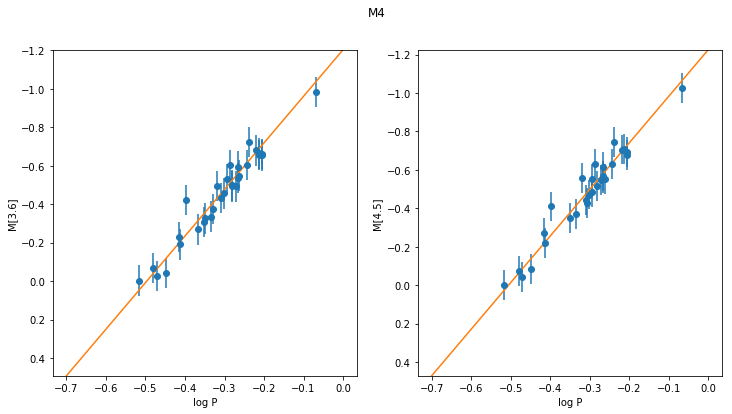

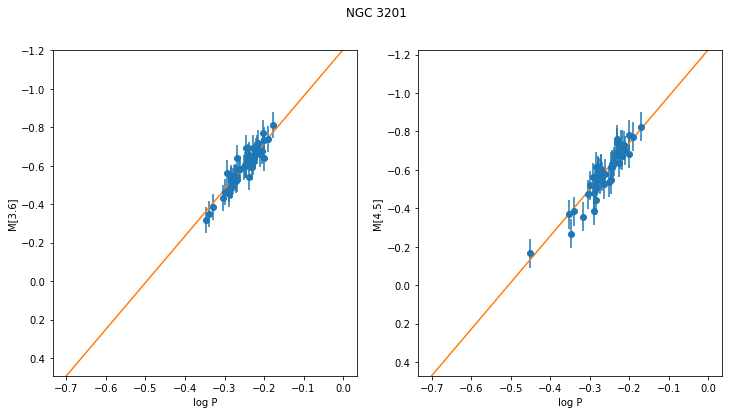

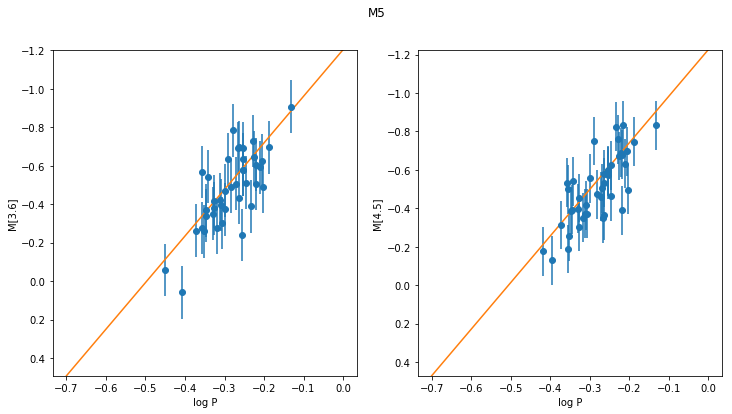

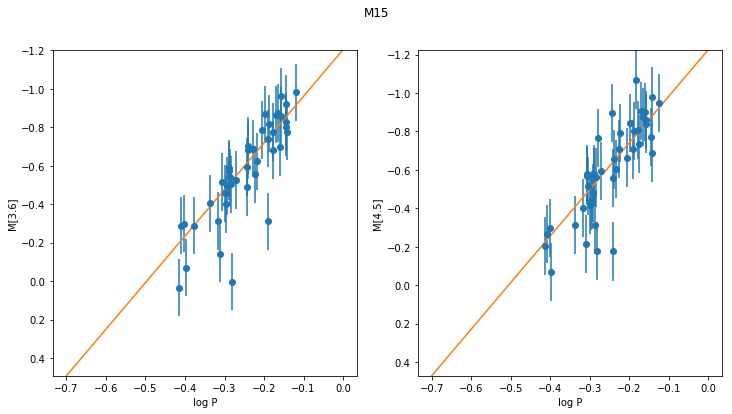

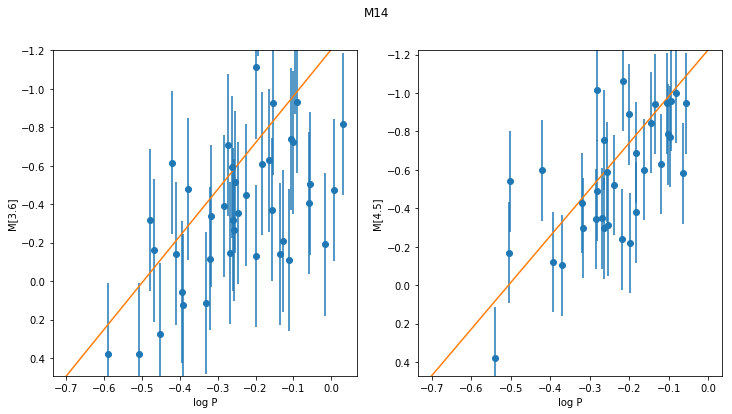

In [37]:
x = np.array([-0.7, 0.0])
y_3p6 = cluster_slope3p6*x + cluster_3p6zp
y_4p5 = cluster_slope4p5*x + cluster_4p5zp


fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M4_logP_3p6, M4_3p6-dm_3p6[0], yerr=M4_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6)
ax2 = fig.add_subplot(122)
ax2.errorbar(M4_logP_4p5, M4_4p5-dm_4p5[0], yerr=M4_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5)
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0]), y_3p6[1])
ax2.set_ylim((y_4p5[0], y_4p5[1]))
fig.suptitle('M4')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(N3201_logP_3p6, N3201_3p6-dm_3p6[1], yerr=N3201_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6)
ax2 = fig.add_subplot(122)
ax2.errorbar(N3201_logP_4p5, N3201_4p5-dm_4p5[1], yerr=N3201_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5)
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0]), y_3p6[1])
ax2.set_ylim((y_4p5[0], y_4p5[1]))
fig.suptitle('NGC 3201')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M5_logP_3p6, M5_3p6-dm_3p6[2], yerr=M5_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6)
ax2 = fig.add_subplot(122)
ax2.errorbar(M5_logP_4p5, M5_4p5-dm_4p5[2], yerr=M5_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5)
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0]), y_3p6[1])
ax2.set_ylim((y_4p5[0], y_4p5[1]))
fig.suptitle('M5')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M15_logP_3p6, M15_3p6-dm_3p6[3], yerr=M15_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6)
ax2 = fig.add_subplot(122)
ax2.errorbar(M15_logP_4p5, M15_4p5-dm_4p5[3], yerr=M15_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5)
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0]), y_3p6[1])
ax2.set_ylim((y_4p5[0], y_4p5[1]))
fig.suptitle('M15')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M14_logP_3p6, M14_3p6-dm_3p6[4], yerr=M14_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6)
ax2 = fig.add_subplot(122)
ax2.errorbar(M14_logP_4p5, M14_4p5-dm_4p5[4], yerr=M14_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5)
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0]), y_3p6[1])
ax2.set_ylim((y_4p5[0], y_4p5[1]))
fig.suptitle('M14')

[ 11.40402105  13.41997001  14.34943165  15.09461826  14.62754504]
[ 11.42831706  13.45400746  14.37412929  15.10977205  14.88739457]


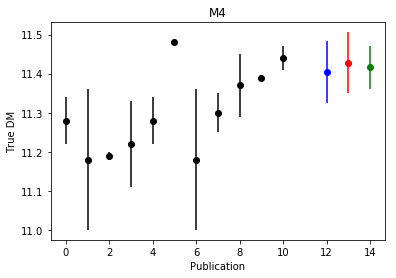

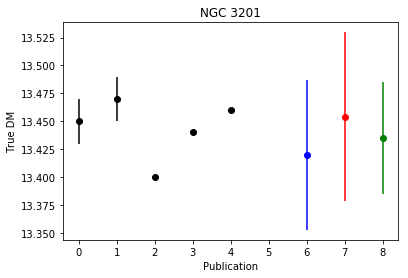

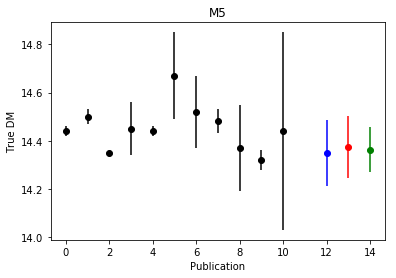

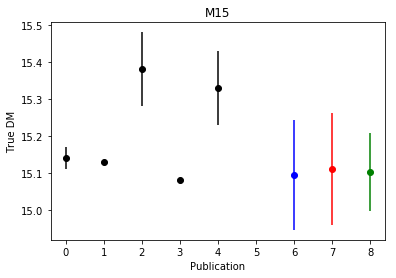

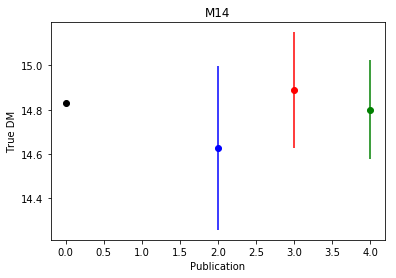

In [38]:
print dm_3p6
print dm_4p5

# literature distance moduli
M4_dm = np.array([11.28, 11.18, 11.19, 11.22, 11.28, 11.48, 11.18, 11.30, 11.37, 11.39, 11.44])
M4_dm_err = np.array([0.06, 0.18, 0.01, 0.11, 0.06, 0.0, 0.18, 0.05, 0.08, 0.0, 0.03])
N3201_dm = np.array([13.45, 13.47, 13.40, 13.44, 13.46])
N3201_dm_err = np.array([0.02, 0.02, 0.0, 0.0, 0.0])
M5_dm = np.array([14.44, 14.50, 14.35, 14.45, 14.44, 14.67, 14.52, 14.48, 14.37, 14.32, 14.44])
M5_dm_err = np.array([0.02, 0.03, 0.0, 0.11, 0.02, 0.18, 0.15, 0.05, 0.18, 0.04, 0.41])
M14_dm = np.array([14.83])
M14_dm_err = np.array([0.0])
M15_dm = np.array([15.14, 15.13, 15.38, 15.08, 15.33])
M15_dm_err = np.array([0.03, 0.0, 0.10, 0.0, 0.10])


fig = mp.figure()
ax = fig.add_subplot(111)
x = np.arange(len(M4_dm))
ax.errorbar(x, M4_dm, yerr=M4_dm_err, fmt='o', color='k')
ax.errorbar([len(M4_dm)+1], dm_3p6[0], yerr=dm_3p6_er[0], fmt='o', color='b')
ax.errorbar([len(M4_dm)+2], dm_4p5[0], yerr=dm_4p5_er[0], fmt='o', color='r')
ax.errorbar([len(M4_dm)+3], dm[0], yerr=dm_er[0], fmt='o', color='g')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.set_title('M4')

fig = mp.figure()
ax = fig.add_subplot(111)
x = np.arange(len(N3201_dm))
ax.errorbar(x, N3201_dm, yerr=N3201_dm_err, fmt='o', color='k')
ax.errorbar([len(N3201_dm)+1], dm_3p6[1], yerr=dm_3p6_er[1], fmt='o', color='b')
ax.errorbar([len(N3201_dm)+2], dm_4p5[1], yerr=dm_4p5_er[1], fmt='o', color='r')
ax.errorbar([len(N3201_dm)+3], dm[1], yerr=dm_er[1], fmt='o', color='g')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.set_title('NGC 3201')

fig = mp.figure()
ax = fig.add_subplot(111)
x = np.arange(len(M5_dm))
ax.errorbar(x, M5_dm, yerr=M5_dm_err, fmt='o', color='k')
ax.errorbar([len(M5_dm)+1], dm_3p6[2], yerr=dm_3p6_er[2], fmt='o', color='b')
ax.errorbar([len(M5_dm)+2], dm_4p5[2], yerr=dm_4p5_er[2], fmt='o', color='r')
ax.errorbar([len(M5_dm)+3], dm[2], yerr=dm_er[2], fmt='o', color='g')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.set_title('M5')


fig = mp.figure()
ax = fig.add_subplot(111)
x = np.arange(len(M15_dm))
ax.errorbar(x, M15_dm, yerr=M15_dm_err, fmt='o', color='k')
ax.errorbar([len(M15_dm)+1], dm_3p6[3], yerr=dm_3p6_er[3], fmt='o', color='b')
ax.errorbar([len(M15_dm)+2], dm_4p5[3], yerr=dm_4p5_er[3], fmt='o', color='r')
ax.errorbar([len(M15_dm)+3], dm[3], yerr=dm_er[3], fmt='o', color='g')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.set_title('M15')


fig = mp.figure()
ax = fig.add_subplot(111)
x = np.arange(len(M14_dm))
ax.errorbar(x, M14_dm, yerr=M14_dm_err, fmt='o', color='k')
ax.errorbar([len(M14_dm)+1], dm_3p6[4], yerr=dm_3p6_er[4], fmt='o', color='b')
ax.errorbar([len(M14_dm)+2], dm_4p5[4], yerr=dm_4p5_er[4], fmt='o', color='r')
ax.errorbar([len(M14_dm)+3], dm[4], yerr=dm_er[4], fmt='o', color='g')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.set_title('M14')



# Theoretical PLZ

In [39]:
theory_slope3p6 = -2.251
theory_slope3p6_err = 0.018
theory_slope4p5 = -2.239
theory_slope4p5_err = 0.018
theory_3p6zp = -0.793
theory_3p6zp_err = 0.007
theory_4p5zp = -0.785
theory_4p5zp_err = 0.007
theory_3p6_met = 0.180
theory_3p6_met_err = 0.003
theory_4p5_met = 0.185
theory_4p5_met_err = 0.003

# calculate absolute magnitudes for the cluster RRL using the calibrated PL
M4_M3p6 = theory_slope3p6*M4_logP_3p6 + theory_3p6zp + theory_3p6_met*cluster_feh[0]
M4_M4p5 = theory_slope4p5*M4_logP_4p5 + theory_4p5zp + theory_3p6_met*cluster_feh[0]
N3201_M3p6 = theory_slope3p6*N3201_logP_3p6 + theory_3p6zp + theory_3p6_met*cluster_feh[1]
N3201_M4p5 = theory_slope4p5*N3201_logP_4p5 + theory_4p5zp + theory_3p6_met*cluster_feh[1]
M5_M3p6 = theory_slope3p6*M5_logP_3p6 + theory_3p6zp + theory_3p6_met*cluster_feh[2]
M5_M4p5 = theory_slope4p5*M5_logP_4p5 + theory_4p5zp + theory_3p6_met*cluster_feh[2]
M15_M3p6 = theory_slope3p6*M15_logP_3p6 + theory_3p6zp + theory_3p6_met*cluster_feh[3]
M15_M4p5 = theory_slope4p5*M15_logP_4p5 + theory_4p5zp + theory_3p6_met*cluster_feh[3]
M14_M3p6 = theory_slope3p6*M14_logP_3p6 + theory_3p6zp + theory_3p6_met*cluster_feh[4]
M14_M4p5 = theory_slope4p5*M14_logP_4p5 + theory_4p5zp + theory_3p6_met*cluster_feh[4]

M4_M3p6_er = np.sqrt((theory_slope3p6_err*M4_logP_3p6)**2 + theory_3p6zp_err**2 + theory_3p6_met_err**2)
M4_M4p5_er = np.sqrt((theory_slope4p5_err*M4_logP_4p5)**2 + theory_4p5zp_err**2 + theory_3p6_met_err**2)
N3201_M3p6_er = np.sqrt((theory_slope3p6_err*N3201_logP_3p6)**2 + theory_3p6zp_err**2 + theory_3p6_met_err**2)
N3201_M4p5_er = np.sqrt((theory_slope4p5_err*N3201_logP_4p5)**2 + theory_4p5zp_err**2 + theory_3p6_met_err**2)
M5_M3p6_er = np.sqrt((theory_slope3p6_err*M5_logP_3p6)**2 + theory_3p6zp_err**2 + theory_3p6_met_err**2)
M5_M4p5_er = np.sqrt((theory_slope4p5_err*M5_logP_4p5)**2 + theory_4p5zp_err**2 + theory_3p6_met_err**2)
M15_M3p6_er = np.sqrt((theory_slope3p6_err*M15_logP_3p6)**2 + theory_3p6zp_err**2 + theory_3p6_met_err**2)
M15_M4p5_er = np.sqrt((theory_slope4p5_err*M15_logP_4p5)**2 + theory_4p5zp_err**2 + theory_3p6_met_err**2)
M14_M3p6_er = np.sqrt((theory_slope3p6_err*M14_logP_3p6)**2 + theory_3p6zp_err**2 + theory_3p6_met_err**2)
M14_M4p5_er = np.sqrt((theory_slope4p5_err*M14_logP_4p5)**2 + theory_4p5zp_err**2 + theory_3p6_met_err**2)

In [46]:
# calculate distance moduli 
dm_3p6 = np.zeros(5)
dm_4p5 = np.zeros(5)
dm_3p6_er = np.zeros(5)
dm_4p5_er = np.zeros(5)

M4_3p6_dm = M4_3p6 - M4_M3p6
M4_4p5_dm = M4_4p5 - M4_M4p5
N3201_3p6_dm = N3201_3p6 - N3201_M3p6
N3201_4p5_dm = N3201_4p5 - N3201_M4p5
M5_3p6_dm = M5_3p6 - M5_M3p6
M5_4p5_dm = M5_4p5 - M5_M4p5
M15_3p6_dm = M15_3p6 - M15_M3p6
M15_4p5_dm = M15_4p5 - M15_M4p5
M14_3p6_dm = M14_3p6 - M14_M3p6
M14_4p5_dm = M14_4p5 - M14_M4p5

#M4_3p6_dm_er = np.sqrt(M4_3p6_er**2 + M4_M3p6_er**2)
#M4_4p5_dm_er = np.sqrt(M4_4p5_er**2 + M4_M4p5_er**2)
#N3201_3p6_dm_er = np.sqrt(N3201_3p6_er**2 + N3201_M3p6_er**2)
#N3201_4p5_dm_er = np.sqrt(N3201_4p5_er**2 + N3201_M4p5_er**2)
#M5_3p6_dm_er = np.sqrt(M5_3p6_er**2 + M5_M3p6_er**2)
#M5_4p5_dm_er = np.sqrt(M5_4p5_er**2 + M5_M4p5_er**2)
#M15_3p6_dm_er = np.sqrt(M15_3p6_er**2 + M15_M3p6_er**2)
#M15_4p5_dm_er = np.sqrt(M15_4p5_er**2 + M15_M4p5_er**2)
#M14_3p6_dm_er = np.sqrt(M14_3p6_er**2 + M14_M3p6_er**2)
#M14_4p5_dm_er = np.sqrt(M14_4p5_er**2 + M14_M4p5_er**2)

M4_3p6_dm_er = np.sqrt(theory_3p6zp_err**2 + np.std(M4_3p6_dm)**2)
M4_4p5_dm_er = np.sqrt(theory_4p5zp_err**2 + np.std(M4_4p5_dm)**2)
N3201_3p6_dm_er = np.sqrt(theory_3p6zp_err**2 + np.std(N3201_3p6_dm)**2)
N3201_4p5_dm_er = np.sqrt(theory_4p5zp_err**2 + np.std(N3201_4p5_dm)**2)
M5_3p6_dm_er = np.sqrt(theory_3p6zp_err**2 + np.std(M5_3p6_dm)**2)
M5_4p5_dm_er = np.sqrt(theory_4p5zp_err**2 + np.std(M5_4p5_dm)**2)
M15_3p6_dm_er = np.sqrt(theory_3p6zp_err**2 + np.std(M15_3p6_dm)**2)
M15_4p5_dm_er = np.sqrt(theory_4p5zp_err**2 + np.std(M15_4p5_dm)**2)
M14_3p6_dm_er = np.sqrt(theory_3p6zp_err**2 + np.std(M14_3p6_dm)**2)
M14_4p5_dm_er = np.sqrt(theory_4p5zp_err**2 + np.std(M14_4p5_dm)**2)

dm_3p6[0] = np.average(M4_3p6_dm, weights=1/M4_3p6_er**2)
dm_4p5[0] = np.average(M4_4p5_dm, weights=1/M4_4p5_er**2)
dm_3p6[1] = np.average(N3201_3p6_dm, weights=1/N3201_3p6_er**2)
dm_4p5[1] = np.average(N3201_4p5_dm, weights=1/N3201_4p5_er**2)
dm_3p6[2] = np.average(M5_3p6_dm, weights=1/M5_3p6_er**2)
dm_4p5[2] = np.average(M5_4p5_dm, weights=1/M5_4p5_er**2)
dm_3p6[3] = np.average(M15_3p6_dm, weights=1/M15_3p6_er**2)
dm_4p5[3] = np.average(M15_4p5_dm, weights=1/M15_4p5_er**2)
dm_3p6[4] = np.average(M14_3p6_dm, weights=1/M14_3p6_er**2)
dm_4p5[4] = np.average(M14_4p5_dm, weights=1/M14_4p5_er**2)

dm_3p6_er[0] = np.sqrt(theory_3p6zp_err**2 + np.std(M4_3p6_dm)**2)
dm_4p5_er[0] = np.sqrt(theory_4p5zp_err**2 + np.std(M4_4p5_dm)**2)
dm_3p6_er[1] = np.sqrt(theory_3p6zp_err**2 + np.std(N3201_3p6_dm)**2)
dm_4p5_er[1] = np.sqrt(theory_4p5zp_err**2 + np.std(N3201_4p5_dm)**2)
dm_3p6_er[2] = np.sqrt(theory_3p6zp_err**2 + np.std(M5_3p6_dm)**2)
dm_4p5_er[2] = np.sqrt(theory_4p5zp_err**2 + np.std(M5_4p5_dm)**2)
dm_3p6_er[3] = np.sqrt(theory_3p6zp_err**2 + np.std(M15_3p6_dm)**2)
dm_4p5_er[3] = np.sqrt(theory_4p5zp_err**2 + np.std(M15_4p5_dm)**2)
dm_3p6_er[4] = np.sqrt(theory_3p6zp_err**2 + np.std(M14_3p6_dm)**2)
dm_4p5_er[4] = np.sqrt(theory_4p5zp_err**2 + np.std(M14_4p5_dm)**2)

print np.std(M4_3p6_dm), np.std(M14_3p6_dm)
th_dm = np.zeros(5)
th_dm_er = np.zeros(5)
th_dm[0] = np.average([dm_3p6[0], dm_4p5[0]], weights=[1/dm_3p6_er[0]**2, 1/dm_4p5_er[0]**2])
th_dm_er[0] = np.average([dm_3p6_er[0], dm_4p5_er[0]])/np.sqrt(2)
th_dm[1] = np.average([dm_3p6[1], dm_4p5[1]], weights=[1/dm_3p6_er[1]**2, 1/dm_4p5_er[1]**2])
th_dm_er[1] = np.average([dm_3p6_er[1], dm_4p5_er[1]])/np.sqrt(2)
th_dm[2] = np.average([dm_3p6[2], dm_4p5[2]], weights=[1/dm_3p6_er[2]**2, 1/dm_4p5_er[2]**2])
th_dm_er[2] = np.average([dm_3p6_er[2], dm_4p5_er[2]])/np.sqrt(2)
th_dm[3] = np.average([dm_3p6[3], dm_4p5[3]], weights=[1/dm_3p6_er[3]**2, 1/dm_4p5_er[3]**2])
th_dm_er[3] = np.average([dm_3p6_er[3], dm_4p5_er[3]])/np.sqrt(2)
th_dm[4] = np.average([dm_3p6[4], dm_4p5[4]], weights=[1/dm_3p6_er[4]**2, 1/dm_4p5_er[4]**2])
th_dm_er[4] = np.average([dm_3p6_er[4], dm_4p5_er[4]])/np.sqrt(2)

print dm_3p6
print dm_3p6_er
print dm_4p5
print dm_4p5_er
print th_dm
print th_dm_er


0.053917407157 0.356994931492
[ 11.25701025  13.33855528  14.22348121  15.15739137  14.49463611]
[ 0.05436991  0.03829467  0.12470987  0.14109709  0.35706355]
[ 11.25746136  13.35055821  14.22230869  15.14589218  14.72787162]
[ 0.05350304  0.05243976  0.11300772  0.14345388  0.24918669]
[ 11.25723943  13.34272994  14.22283737  15.15173701  14.65148231]
[ 0.03813884  0.03207947  0.08404586  0.10060396  0.21434183]


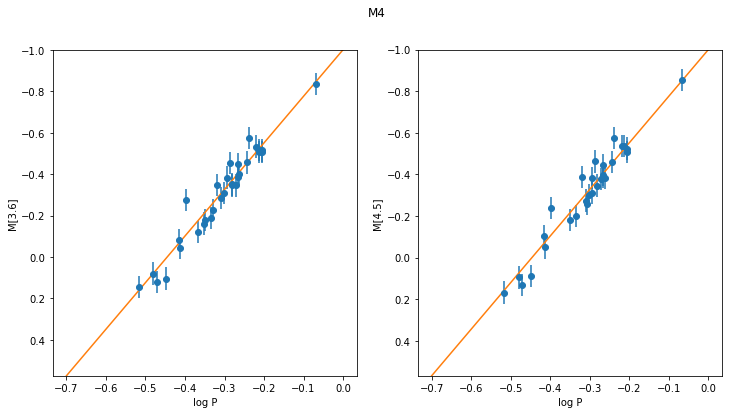

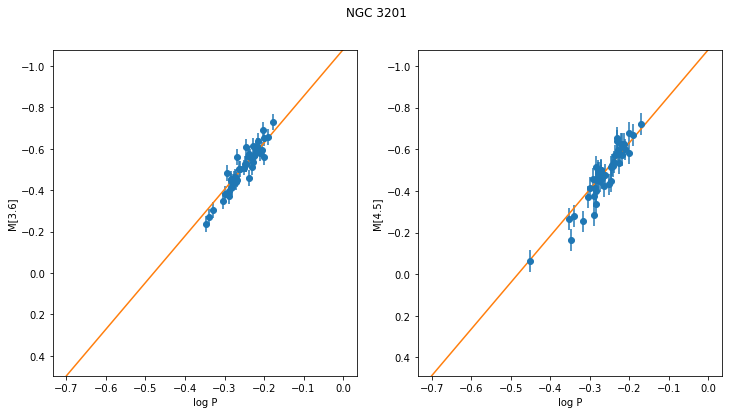

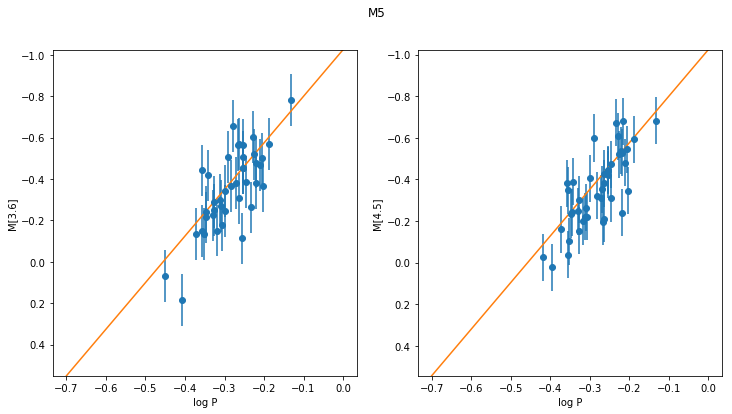

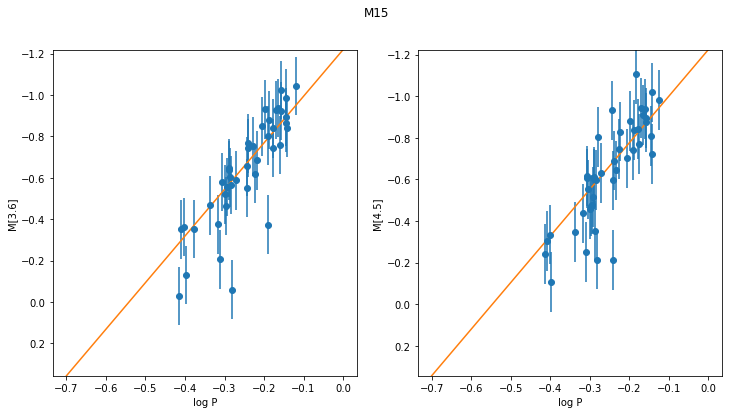

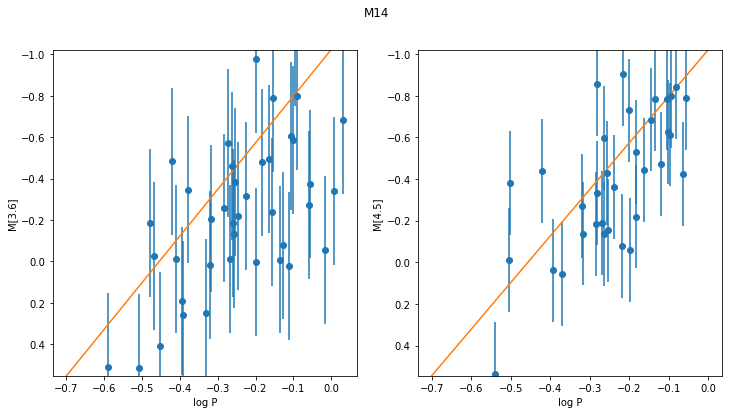

In [43]:
x = np.array([-0.7, 0.0])
y_3p6 = theory_slope3p6*x + theory_3p6zp
y_4p5 = theory_slope4p5*x + theory_4p5zp


fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M4_logP_3p6, M4_3p6-dm_3p6[0], yerr=M4_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6 + theory_3p6_met*cluster_feh[0])
ax2 = fig.add_subplot(122)
ax2.errorbar(M4_logP_4p5, M4_4p5-dm_4p5[0], yerr=M4_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5 + theory_4p5_met*cluster_feh[0])
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0] + theory_3p6_met*cluster_feh[0], y_3p6[1] + theory_3p6_met*cluster_feh[0]))
ax2.set_ylim((y_4p5[0] + theory_4p5_met*cluster_feh[0], y_4p5[1] + theory_4p5_met*cluster_feh[0]))
fig.suptitle('M4')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(N3201_logP_3p6, N3201_3p6-dm_3p6[1], yerr=N3201_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6 + theory_3p6_met*cluster_feh[1])
ax2 = fig.add_subplot(122)
ax2.errorbar(N3201_logP_4p5, N3201_4p5-dm_4p5[1], yerr=N3201_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5 + theory_4p5_met*cluster_feh[1])
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0] + theory_3p6_met*cluster_feh[1], y_3p6[1] + theory_3p6_met*cluster_feh[1]))
ax2.set_ylim((y_4p5[0] + theory_4p5_met*cluster_feh[1], y_4p5[1] + theory_4p5_met*cluster_feh[1]))
fig.suptitle('NGC 3201')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M5_logP_3p6, M5_3p6-dm_3p6[2], yerr=M5_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6 + theory_3p6_met*cluster_feh[2])
ax2 = fig.add_subplot(122)
ax2.errorbar(M5_logP_4p5, M5_4p5-dm_4p5[2], yerr=M5_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5 + theory_4p5_met*cluster_feh[2])
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0] + theory_3p6_met*cluster_feh[2], y_3p6[1] + theory_3p6_met*cluster_feh[2]))
ax2.set_ylim((y_4p5[0] + theory_4p5_met*cluster_feh[2], y_4p5[1] + theory_4p5_met*cluster_feh[2]))
fig.suptitle('M5')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M15_logP_3p6, M15_3p6-dm_3p6[3], yerr=M15_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6 + theory_3p6_met*cluster_feh[3])
ax2 = fig.add_subplot(122)
ax2.errorbar(M15_logP_4p5, M15_4p5-dm_4p5[3], yerr=M15_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5 + theory_4p5_met*cluster_feh[3])
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0] + theory_3p6_met*cluster_feh[3], y_3p6[1] + theory_3p6_met*cluster_feh[3]))
ax2.set_ylim((y_4p5[0] + theory_4p5_met*cluster_feh[3], y_4p5[1] + theory_4p5_met*cluster_feh[3]))
fig.suptitle('M15')

fig = mp.figure(figsize=(12,6))
ax = fig.add_subplot(121)
ax.errorbar(M14_logP_3p6, M14_3p6-dm_3p6[4], yerr=M14_3p6_dm_er, fmt='o')
ax.plot(x, y_3p6 + theory_3p6_met*cluster_feh[4])
ax2 = fig.add_subplot(122)
ax2.errorbar(M14_logP_4p5, M14_4p5-dm_4p5[4], yerr=M14_4p5_dm_er, fmt='o')
ax2.plot(x, y_4p5 + theory_4p5_met*cluster_feh[4])
ax.set_xlabel('log P')
ax2.set_xlabel('log P')
ax.set_ylabel('M[3.6]')
ax2.set_ylabel('M[4.5]')
ax.set_ylim((y_3p6[0] + theory_3p6_met*cluster_feh[4], y_3p6[1] + theory_3p6_met*cluster_feh[4]))
ax2.set_ylim((y_4p5[0] + theory_4p5_met*cluster_feh[4], y_4p5[1] + theory_4p5_met*cluster_feh[4]))
fig.suptitle('M14')

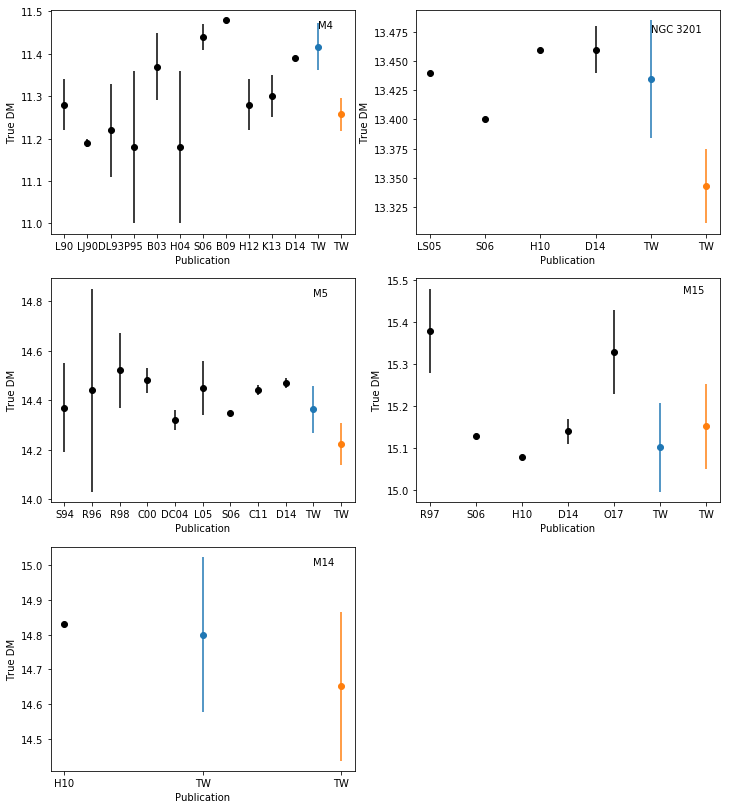

In [45]:

# literature distance moduli
M4_dm = np.array([11.28, 11.18, 11.19, 11.22, 11.28, 11.48, 11.18, 11.30, 11.37, 11.39, 11.44])
M4_dm_err = np.array([0.06, 0.18, 0.01, 0.11, 0.06, 0.0, 0.18, 0.05, 0.08, 0.0, 0.03])
M4_refs = np.array(['H12', 'P95', 'LJ90', 'DL93', 'L90', 'B09', 'H04', 'K13', 'B03', 'D14', 'S06'])
M4_order = [4, 2, 3, 1, 8, 6, 10, 5, 0, 7, 9]
N3201_dm = np.array([13.46, 13.40, 13.44, 13.46])
N3201_dm_err = np.array([0.02, 0.0, 0.0, 0.0])
N3201_refs = np.array(['D14', 'S06', 'LS05', 'H10'])
N3201_order = [2, 1, 3, 0]
M5_dm = np.array([14.47, 14.35, 14.45, 14.44, 14.52, 14.48, 14.37, 14.32, 14.44])
M5_dm_err = np.array([0.02, 0.0, 0.11, 0.02, 0.15, 0.05, 0.18, 0.04, 0.41])
M5_refs = np.array(['D14', 'S06', 'L05', 'C11', 'R98', 'C00', 'S94', 'DC04', 'R96'])
M5_order = [6, 8, 4, 5, 7, 2, 1, 3, 0]
M14_dm = np.array([14.83])
M14_dm_err = np.array([0.0])
M14_refs = np.array(['H10'])
M14_order = [0]
M15_dm = np.array([15.14, 15.13, 15.38, 15.08, 15.33])
M15_dm_err = np.array([0.03, 0.0, 0.10, 0.0, 0.10])
M15_refs = np.array(['D14', 'S06', 'R97', 'H10', 'O17'])
M15_order = [2, 1, 3, 0, 4]


fig = mp.figure(figsize=(12,14))
ax = fig.add_subplot(321)
x = np.arange(len(M4_dm))
ax.errorbar(x, M4_dm[M4_order], yerr=M4_dm_err[M4_order], fmt='o', color='k')
ax.errorbar([len(M4_dm)], dm[0], yerr=dm_er[0], fmt='o')
ax.errorbar([len(M4_dm)+1], th_dm[0], yerr=th_dm_er[0], fmt='o')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.text(11, 11.46, 'M4')
ax.set_xticks(np.append(x, [len(M4_dm), len(M4_dm)+1]))
ax.set_xticklabels(np.append(M4_refs[M4_order], ['TW', 'TW']))

#fig = mp.figure()
ax = fig.add_subplot(322)
x = np.arange(len(N3201_dm))
ax.errorbar(x, N3201_dm[N3201_order], yerr=N3201_dm_err[N3201_order], fmt='o', color='k')
ax.errorbar([len(N3201_dm)], dm[1], yerr=dm_er[1], fmt='o')
ax.errorbar([len(N3201_dm)+1], th_dm[1], yerr=th_dm_er[1], fmt='o')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.text(4, 13.475, 'NGC 3201')
ax.set_xticks(np.append(x, [len(N3201_dm), len(N3201_dm)+1]))
ax.set_xticklabels(np.append(N3201_refs[N3201_order], ['TW', 'TW']))

#fig = mp.figure()
ax = fig.add_subplot(323)
x = np.arange(len(M5_dm))
ax.errorbar(x, M5_dm[M5_order], yerr=M5_dm_err[M5_order], fmt='o', color='k')
ax.errorbar([len(M5_dm)], dm[2], yerr=dm_er[2], fmt='o')
ax.errorbar([len(M5_dm)+1], th_dm[2], yerr=th_dm_er[2], fmt='o')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.text(9, 14.82, 'M5')
ax.set_xticks(np.append(x, [len(M5_dm), len(M5_dm)+1]))
ax.set_xticklabels(np.append(M5_refs[M5_order], ['TW', 'TW']))

#fig = mp.figure()
ax = fig.add_subplot(324)
x = np.arange(len(M15_dm))
ax.errorbar(x, M15_dm[M15_order], yerr=M15_dm_err[M15_order], fmt='o', color='k')
ax.errorbar([len(M15_dm)], dm[3], yerr=dm_er[3], fmt='o')
ax.errorbar([len(M15_dm)+1], th_dm[3], yerr=th_dm_er[3], fmt='o')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.text(5.5, 15.47, 'M15')
ax.set_xticks(np.append(x, [len(M15_dm), len(M15_dm)+1]))
ax.set_xticklabels(np.append(M15_refs[M15_order], ['TW', 'TW']))

#fig = mp.figure()
ax = fig.add_subplot(325)
x = np.arange(len(M14_dm))
ax.errorbar(x, M14_dm[M14_order], yerr=M14_dm_err[M14_order], fmt='o', color='k')
ax.errorbar([len(M14_dm)], dm[4], yerr=dm_er[4], fmt='o')
ax.errorbar([len(M14_dm)+1], th_dm[4], yerr=th_dm_er[4], fmt='o')
ax.set_xlabel('Publication')
ax.set_ylabel('True DM')
ax.text(1.8, 15.0, 'M14')
ax.set_xticks(np.append(x, [len(M14_dm), len(M14_dm)+1]))
ax.set_xticklabels(np.append(M14_refs[M14_order], ['TW', 'TW']))

mp.savefig(data_dir+'dms.eps', format='eps')

In [34]:
mp.close('all')

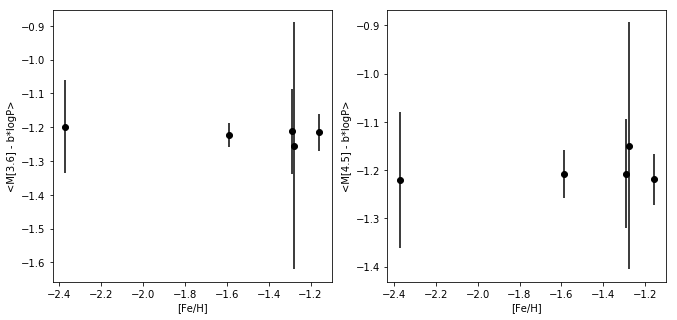

In [34]:
# check for metallicity dependence of zp

M3p6 = np.zeros(5)
M3p6[0] = np.average(M4_3p6-dm[0] - cluster_slope3p6*M4_logP_3p6)
M3p6[1] = np.average(N3201_3p6-dm[1] - cluster_slope3p6*N3201_logP_3p6)
M3p6[2] = np.average(M5_3p6-dm[2] - cluster_slope3p6*M5_logP_3p6)
M3p6[3] = np.average(M15_3p6-dm[3] - cluster_slope3p6*M15_logP_3p6)
M3p6[4] = np.average(M14_3p6-dm[4] - cluster_slope3p6*M14_logP_3p6)

M3p6_e = np.zeros(5)
M3p6_e[0] = np.std(M4_3p6-dm[0] - cluster_slope3p6*M4_logP_3p6)
M3p6_e[1] = np.std(N3201_3p6-dm[1] - cluster_slope3p6*N3201_logP_3p6)
M3p6_e[2] = np.std(M5_3p6-dm[2] - cluster_slope3p6*M5_logP_3p6)
M3p6_e[3] = np.std(M15_3p6-dm[3] - cluster_slope3p6*M15_logP_3p6)
M3p6_e[4] = np.std(M14_3p6-dm[4] - cluster_slope3p6*M14_logP_3p6)

#M3p6_e = np.zeros(5)
#M3p6_e[0] = np.sqrt(np.average(M4_3p6_er)**2 + dm_er[0]**2 + (cluster_slope3p6_err*np.average(M4_logP_3p6))**2)
#M3p6_e[1] = np.sqrt(np.average(N3201_3p6_er)**2 + dm_er[1]**2 + (cluster_slope3p6_err*np.average(N3201_logP_3p6))**2)
#M3p6_e[2] = np.sqrt(np.average(M5_3p6_er)**2 + dm_er[2]**2 + (cluster_slope3p6_err*np.average(M5_logP_3p6))**2)
#M3p6_e[3] = np.sqrt(np.average(M15_3p6_er)**2 + dm_er[3]**2 + (cluster_slope3p6_err*np.average(M15_logP_3p6))**2)
#M3p6_e[4] = np.sqrt(np.average(M14_3p6_er)**2 + dm_er[4]**2 + (cluster_slope3p6_err*np.average(M14_logP_3p6))**2)

#M4p5_e = np.zeros(5)
#M4p5_e[0] = np.sqrt(np.average(M4_4p5_er)**2 + dm_er[0]**2 + (cluster_slope4p5_err*np.average(M4_logP_4p5))**2)
#M4p5_e[1] = np.sqrt(np.average(N3201_4p5_er)**2 + dm_er[1]**2 + (cluster_slope4p5_err*np.average(N3201_logP_4p5))**2)
#M4p5_e[2] = np.sqrt(np.average(M5_4p5_er)**2 + dm_er[2]**2 + (cluster_slope4p5_err*np.average(M5_logP_4p5))**2)
#M4p5_e[3] = np.sqrt(np.average(M15_4p5_er)**2 + dm_er[3]**2 + (cluster_slope4p5_err*np.average(M15_logP_4p5))**2)
#M4p5_e[4] = np.sqrt(np.average(M14_4p5_er)**2 + dm_er[4]**2 + (cluster_slope4p5_err*np.average(M14_logP_4p5))**2)



M4p5 = np.zeros(5)
M4p5[0] = np.average(M4_4p5-dm[0] - cluster_slope4p5*M4_logP_4p5)
M4p5[1] = np.average(N3201_4p5-dm[1] - cluster_slope4p5*N3201_logP_4p5)
M4p5[2] = np.average(M5_4p5-dm[2] - cluster_slope4p5*M5_logP_4p5)
M4p5[3] = np.average(M15_4p5-dm[3] - cluster_slope4p5*M15_logP_4p5)
M4p5[4] = np.average(M14_4p5-dm[4] - cluster_slope4p5*M14_logP_4p5)

M4p5_e = np.zeros(5)
M4p5_e[0] = np.std(M4_4p5-dm[0] - cluster_slope4p5*M4_logP_4p5)
M4p5_e[1] = np.std(N3201_4p5-dm[1] - cluster_slope4p5*N3201_logP_4p5)
M4p5_e[2] = np.std(M5_4p5-dm[2] - cluster_slope4p5*M5_logP_4p5)
M4p5_e[3] = np.std(M15_4p5-dm[3] - cluster_slope4p5*M15_logP_4p5)
M4p5_e[4] = np.std(M14_4p5-dm[4] - cluster_slope4p5*M14_logP_4p5)

fig = mp.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
#ax1.plot([0, 4], [theory_3p6_zp-dm, theory_3p6zp-dm], color='r')
ax1.errorbar(cluster_feh, M3p6, yerr=M3p6_e, fmt='o', color='k')
ax1.set_ylabel('<M[3.6] - b*logP>')
ax1.set_xlabel('[Fe/H]')
#ax1.set_ylim((-3.4, -1.4))
#ax1.set_ylim((-1.4, -1.1))

ax2 = fig.add_subplot(122)
#ax2.plot([0, 4], [theory_slope4p5, theory_slope4p5], color='r')
ax2.errorbar(cluster_feh, M4p5, yerr=M4p5_e, fmt='o', color='k')
ax2.set_ylabel('<M[4.5] - b*logP>')
ax2.set_xlabel('[Fe/H]')
#ax2.set_ylim((-1.4, -1.1))


mp.savefig(data_dir+'zp-vs-met.eps', format='eps')